In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Tableaux des fréquences**

In [2]:
data = pd.Series([8, 9, 8, 9, 7, 8, 9, 9, 8, 9, 7, 10, 9, 8, 6, 7, 8, 8, 9, 6])

In [3]:
data.value_counts()

8     7
9     7
7     3
6     2
10    1
dtype: int64

Cette méthode crée un tableau des fréquences avec des classes d’un seul élément.

Par défaut les valeurs sont ordonnées de la plus fréquente à la moins fréquente.

Si on veut que les valeurs soient ordonnées de la plus petite au plus grand il faut rajouter .sort_index().

In [4]:
data.value_counts().sort_index()

6     2
7     3
8     7
9     7
10    1
dtype: int64

On a obtenu ainsi le même tableau des fréquences que celui vu en cours.

Pour avoir un tableau de fréquences relatives il faut rajouter "normalize = True" comme paramètre.

In [5]:
data.value_counts(normalize = True).sort_index()

6     0.10
7     0.15
8     0.35
9     0.35
10    0.05
dtype: float64

On essaye maintenant de créer un tableau des fréquences avec des classes constituées par des intervalles et pas par une seule valeur.

In [6]:
data2 = pd.Series([76, 72, 88, 60, 72, 68, 80, 64, 68, 68, 80, 76, 68, 72, 96, 72, 68, 72, 64, 80,
64, 80, 76, 76, 76, 80, 104, 88, 60, 76, 72, 72, 88, 80, 60, 72, 88, 88, 124, 64])

In [7]:
pd.cut(data2, bins = [60, 70, 80, 90, 100, 110, 120, 130]).value_counts().sort_index()

(60, 70]       9
(70, 80]      20
(80, 90]       5
(90, 100]      1
(100, 110]     1
(110, 120]     0
(120, 130]     1
dtype: int64

On s’aperçoit que le tableau n’est pas le même que celui vu en cours (contrôler la slide 10 du 2ème chapitre). Le problème est dû au fait qu’avec Pandas les intervalles sont ouverts à gauche, donc le premier intervalle ici est = (60, 70] = [61-70], alors que nous voulions [60-69].

Donc il faut changer les valeurs des bins, qui ne doivent pas être [60, 70, 80, 90, 100, 110, 120, 130] mais [59, 69, 79, 89, 99, 109, 119, 129].

In [8]:
pd.cut(data2, bins = [59, 69, 79, 89, 99, 109, 119, 129]).value_counts().sort_index()

(59, 69]      12
(69, 79]      14
(79, 89]      11
(89, 99]       1
(99, 109]      1
(109, 119]     0
(119, 129]     1
dtype: int64

Pour avoir un tableau de fréquences relatives il faut rajouter "normalize = True" comme paramètre.

In [9]:
pd.cut(data2, bins = [59, 69, 79, 89, 99, 109, 119, 129]).value_counts(normalize = True).sort_index()

(59, 69]      0.300
(69, 79]      0.350
(79, 89]      0.275
(89, 99]      0.025
(99, 109]     0.025
(109, 119]    0.000
(119, 129]    0.025
dtype: float64

Pour avoir un tableau de fréquences cumulées il faut rajouter la function cumsum() à la fin.

In [10]:
pd.cut(data2, bins = [59, 69, 79, 89, 99, 109, 119, 129]).value_counts().sort_index().cumsum()

(59, 69]      12
(69, 79]      26
(79, 89]      37
(89, 99]      38
(99, 109]     39
(109, 119]    39
(119, 129]    40
dtype: int64

On remarque que si dans le paramètre "bins" on met un nombre entier positif (par exemple 7) on obtient un tableau de fréquences avec 7 intervalles qui ne correspondent pas forcement à ceux qu’on a choisi auparavant et qui n’ont même pas les mêmes fréquences.

In [47]:
pd.cut(data2, bins = 7).value_counts().sort_index()

(59.936, 69.143]      12
(69.143, 78.286]      14
(78.286, 87.429]       6
(87.429, 96.571]       6
(96.571, 105.714]      1
(105.714, 114.857]     0
(114.857, 124.0]       1
dtype: int64

Si on veut décrémenter tous les éléments d’une liste par 1, on peut procéder ainsi :

In [11]:
bins_dep = [60, 70, 80, 90, 100, 110, 120, 130]
bins_arr = [x-1 for x in bins_dep]
bins_arr

[59, 69, 79, 89, 99, 109, 119, 129]

In [12]:
pd.cut(data2, bins = bins_arr).value_counts().sort_index()

(59, 69]      12
(69, 79]      14
(79, 89]      11
(89, 99]       1
(99, 109]      1
(109, 119]     0
(119, 129]     1
dtype: int64

La liste [59, 69, 79, 89, 99, 109, 119, 129] peut être obtenue aussi des façons suivantes :

In [15]:
bins2 = [*range(59, 130, 10)]
bins2

[59, 69, 79, 89, 99, 109, 119, 129]

In [16]:
bins3 = np.linspace(59, 129, num = 8, dtype = int)
bins3

array([ 59,  69,  79,  89,  99, 109, 119, 129])

Dans les deux cas on obtient le tableau des fréquences correctement.

In [17]:
pd.cut(data2, bins = bins2).value_counts().sort_index()

(59, 69]      12
(69, 79]      14
(79, 89]      11
(89, 99]       1
(99, 109]      1
(109, 119]     0
(119, 129]     1
dtype: int64

In [18]:
pd.cut(data2, bins = bins3).value_counts().sort_index()

(59, 69]      12
(69, 79]      14
(79, 89]      11
(89, 99]       1
(99, 109]      1
(109, 119]     0
(119, 129]     1
dtype: int64

Tableau de fréquences pour des données qualitatives.

In [19]:
data_qual = pd.Series(['CBS', 'Fox', 'ABC', 'Fox', 'CBS', 'CBS', 'ABC', 'Fox', 'CBS', 'ABC', 'CBS', 'CBS', 'NBC', 'CBS',
'NBC', 'NBC', 'CBS', 'CBS', 'NBC', 'NBC'])

In [22]:
data_qual.value_counts().sort_index()

ABC    3
CBS    9
Fox    3
NBC    5
dtype: int64

**Histogrammes**

On peut utiliser soit Matplotlib, soit Seaborn. On fait l’histogramme avec les mêmes intervalles que pour le tableau des fréquences.

D'abord on utilise Matplotlib.

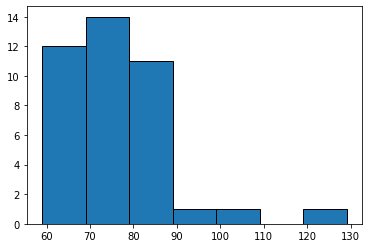

In [23]:
plt.hist(data2, bins = [59, 69, 79, 89, 99, 109, 119, 129], edgecolor ="black");

On s’aperçoit que même si les hauteurs sont correctes, les bornes des intervalles ne le sont pas. Par exemple le premier intervalle commence à 59, alors qu’il devrait commencer à 60.

Le problème est dû au fait qu’avec Matplotlib les intervalles sont fermés à gauche et ouverts à droite, alors que c’était le contraire avec Pandas.

Donc il faut utiliser comme bins [60, 70, 80, 90, 100, 110, 120, 130].

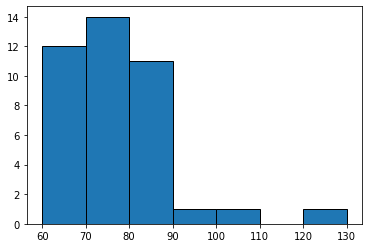

In [27]:
plt.hist(data2, bins = [60, 70, 80, 90, 100, 110, 120, 130], edgecolor = "black");

Comme pour les tableaux des fréquences, si dans le paramètre "bins" on met un nombre entier positif (comme 7) on obtient un histogramme avec 7 intervalles qui ne correspondent pas forcement à ceux qu’on avait choisi.

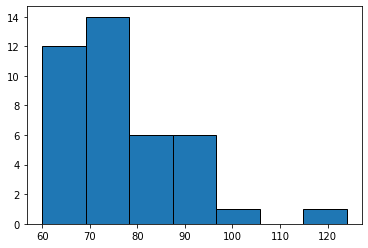

In [48]:
plt.hist(data2, bins = 7, edgecolor = "black");

Pour avoir un histogramme de fréquences relatives il faut rajouter "density = True" comme paramètre.

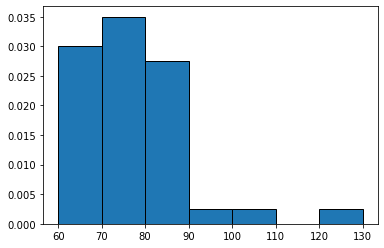

In [28]:
plt.hist(data2, bins = [60, 70, 80, 90, 100, 110, 120, 130], edgecolor = "black", density = True);

Maintenant avec Seaborn.

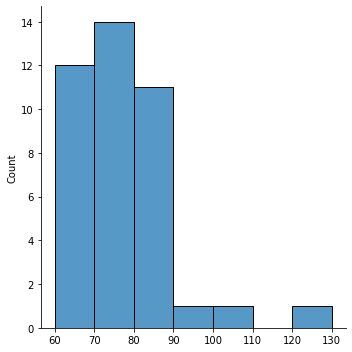

In [29]:
sns.displot(data2, bins = [60, 70, 80, 90, 100, 110, 120, 130]);

Il n'est pas facile de faire des histogrammes de fréquences et cumulatives avec Seaborn.

Par contre faire un polygone des fréquences et une ogive est beaucoup plus simple sur Seaborn que sur Matplotlib.

**Polygone des fréquences** :

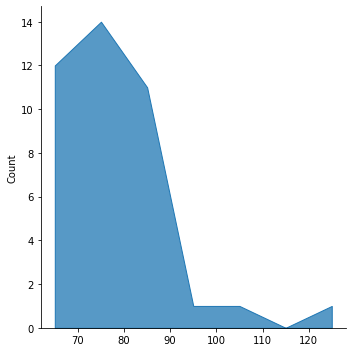

In [30]:
sns.displot(data2, bins = [60, 70, 80, 90, 100, 110, 120, 130], element = "poly");

**Ogive** :

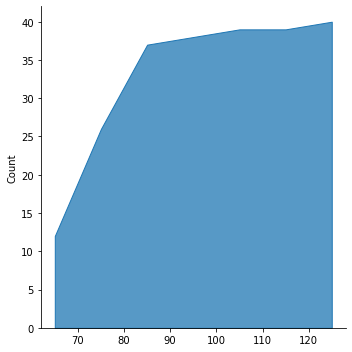

In [31]:
sns.displot(data2, bins = [60, 70, 80, 90, 100, 110, 120, 130], element="poly", cumulative=True);

**Diagramme de Pareto**

Faire un diagramme de Pareto avec Matplotlib demande beaucoup de passages. D’abord on importe le package collections pour créer le dictionnaire de fréquences d’une liste de données.

In [32]:
import collections

diction = collections.Counter(data_qual)
diction

Counter({'CBS': 9, 'Fox': 3, 'ABC': 3, 'NBC': 5})

À partir du dictionnaire ainsi obtenu, on crée la liste des noms des classes et de leurs fréquences.

In [33]:
noms = list(diction.keys())
noms

['CBS', 'Fox', 'ABC', 'NBC']

In [34]:
freq = list(diction.values())
freq

[9, 3, 3, 5]

Enfin on crée un graphique à barres avec ces noms comme comme noms des classes et ces fréquences comme valeurs.

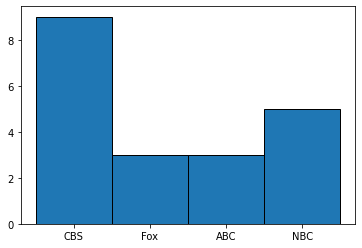

In [35]:
plt.bar(range(len(diction)), freq, tick_label = noms, width = 1.0, edgecolor = "black");

Comme on peut le voir, les barres ne sont pas affichées de la plus à la moins fréquente. Pour ce faire, il faut ordonner le dictionnaire des fréquences et utiliser ceci dans le graphe à barres. 

In [36]:
dict_ord = dict(sorted(diction.items(), key = lambda x:x[1], reverse = True))
dict_ord

{'CBS': 9, 'NBC': 5, 'Fox': 3, 'ABC': 3}

In [37]:
noms_ord = list(dict_ord.keys())
noms_ord

['CBS', 'NBC', 'Fox', 'ABC']

In [38]:
freq_ord = list(dict_ord.values())
freq_ord

[9, 5, 3, 3]

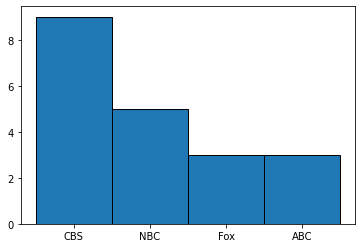

In [42]:
plt.bar(range(len(dict_ord)), freq_ord, tick_label = noms_ord, width = 1.0, edgecolor = "black");

**Nuage de points** :

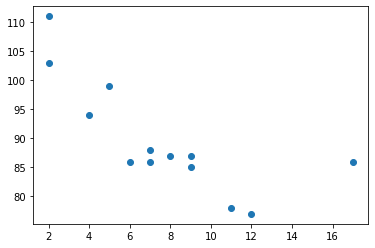

In [45]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y);
